In [1]:
# Import Dependencies
import pandas as pd
from pathlib import Path
import chardet
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
# Changed encoding to allow reading in Jupyter Notebook.
# Skipped first two rows as they couldn't be read, third row was the header row for the data.
unis_adults = pd.read_csv('Resources/uninsured-adults-all-01-30-2024.csv', skiprows=2, encoding='cp1252')
# Reviewing first 15 rows
unis_adults.head(15)

,time_period,state,population,cohort,point_estimate
0,2012,United States,all,All,20.8
1,2013,United States,all,All,20.4
2,2014,United States,all,All,16.3
3,2015,United States,all,All,13.2
4,2016,United States,all,All,12.1
5,2017,United States,all,All,12.2
6,2018,United States,all,All,12.4
7,2019,United States,all,All,12.9
8,2020,United States,all,All,12.4
9,2021,United States,all,All,12.1


In [3]:
# Reading in premature avoidable deaths per 100,000 population per state.
# Skipping first two rows, fixed encoding
avoi_deaths = pd.read_csv('Resources/premature-avoidable-deaths-per-100,000-population-all-01-25-2024.csv', skiprows=2, encoding='cp1252')
avoi_deaths.head(15)

,time_period,state,population,cohort,point_estimate
0,2018-19,United States,all,All,250.1
1,2019-20,United States,all,All,276.7
2,2020-21,United States,all,All,320.8
3,2018-19,Alabama,all,All,321.2
4,2019-20,Alabama,all,All,351.0
5,2020-21,Alabama,all,All,417.9
6,2018-19,Alaska,all,All,261.7
7,2019-20,Alaska,all,All,282.4
8,2020-21,Alaska,all,All,342.3
9,2018-19,Arizona,all,All,249.3


In [4]:
# Reading in preventable deaths per 100,000 population per state.
# Skipping first two rows, fixed encoding
prev_deaths = pd.read_csv('Resources/premature-deaths-from-preventable-causes-per-100,000-population-all-01-29-2024.csv', skiprows=2, encoding='cp1252')
prev_deaths.head(15)

,time_period,state,population,cohort,point_estimate
0,2018-19,United States,all,All,166.3
1,2019-20,United States,all,All,190.8
2,2020-21,United States,all,All,231.9
3,2018-19,Alabama,all,All,212.6
4,2019-20,Alabama,all,All,241.0
5,2020-21,Alabama,all,All,302.4
6,2018-19,Alaska,all,All,193.9
7,2019-20,Alaska,all,All,209.4
8,2020-21,Alaska,all,All,262.2
9,2018-19,Arizona,all,All,173.2


In [5]:
# Reading in premature deaths per 100,000 population per state.
# Skipping first two rows, fixed encoding
treat_deaths = pd.read_csv('Resources/premature-deaths-from-treatable-causes-per-100,000-population-all-01-29-2024.csv', skiprows=2, encoding='cp1252')
treat_deaths.head(15)

,time_period,state,population,cohort,point_estimate
0,2018-19,United States,all,All,83.8
1,2019-20,United States,all,All,85.9
2,2020-21,United States,all,All,88.8
3,2018-19,Alabama,all,All,108.5
4,2019-20,Alabama,all,All,110.0
5,2020-21,Alabama,all,All,115.6
6,2018-19,Alaska,all,All,67.9
7,2019-20,Alaska,all,All,73.1
8,2020-21,Alaska,all,All,80.1
9,2018-19,Arizona,all,All,76.1


In [6]:
# Reading in Adults with a usual source of care per state.
# Skipping first two rows, fixed encoding
adult_care = pd.read_csv('Resources/adults-with-a-usual-source-of-care-all-01-25-2024.csv', skiprows=2, encoding='cp1252')
adult_care.head(15)

,time_period,state,population,cohort,point_estimate
0,2012,United States,all,All,77.8
1,2013,United States,all,All,76.2
2,2014,United States,all,All,77.1
3,2015,United States,all,All,78.4
4,2016,United States,all,All,78.0
5,2017,United States,all,All,77.4
6,2018,United States,all,All,77.1
7,2019,United States,all,All,76.5
8,2020,United States,all,All,76.8
9,2021,United States,all,All,83.2


In [7]:
# Creating variable for the column we want to narrow focus based on
column_name = 'time_period'
# Count the rows where the value in the specified column is '2019'
count_2019 = (unis_adults[column_name] == 2019).sum()
# Confirming row counts per data set
print(f"The number of rows with the value '2019' in {column_name} is: {count_2019} in unis_adults")
count_avoi1819 = (avoi_deaths[column_name] == "2018-19").sum()
print(f"The number of rows with the value '2018-19' in {column_name} is: {count_avoi1819} in avoi_deaths")
count_prev1819 = (prev_deaths[column_name] == "2018-19").sum()
print(f"The number of rows with the value '2018-19' in {column_name} is: {count_prev1819} in prev_deaths")
count_tre1819 = (treat_deaths[column_name] == "2018-19").sum()
print(f"The number of rows with the value '2018-19' in {column_name} is: {count_tre1819} in treat_deaths")
# NOTE: It is 52 rather than 50 because the data sets contain 50 states + District of Columbia + + United States (likely averages)

The number of rows with the value '2019' in time_period is: 52 in unis_adults
The number of rows with the value '2018-19' in time_period is: 52 in avoi_deaths
The number of rows with the value '2018-19' in time_period is: 52 in prev_deaths
The number of rows with the value '2018-19' in time_period is: 52 in treat_deaths


In [8]:
# Filtering down to only rows with the values of 2018 or 2019 in the column "time_period"
adult_care_1819 = pd.DataFrame(adult_care.loc[(unis_adults["time_period"] == 2019) | (adult_care["time_period"] == 2018)]).reset_index()
adult_care_1819.head(7)

,index,time_period,state,population,cohort,point_estimate
0,6,2018,United States,all,All,77.1
1,7,2019,United States,all,All,76.5
2,16,2018,Alabama,all,All,78.0
3,17,2019,Alabama,all,All,77.3
4,26,2018,Alaska,all,All,63.0
5,27,2019,Alaska,all,All,68.1
6,36,2018,Arizona,all,All,73.4


In [9]:
#Renaming of columns and verifying change
adult_care_1819_named = adult_care_1819.rename(columns={"point_estimate": "Percentage of Adults visit Reg Doctors",
                                    "index": "Index", "time_period": "Years", "state": "State", "population": "Population", "cohort": "Cohort"})
adult_care_1819_named.head()

,Index,Years,State,Population,Cohort,Percentage of Adults visit Reg Doctors
0,6,2018,United States,all,All,77.1
1,7,2019,United States,all,All,76.5
2,16,2018,Alabama,all,All,78.0
3,17,2019,Alabama,all,All,77.3
4,26,2018,Alaska,all,All,63.0


In [10]:
adult_care_cleaned = adult_care_1819_named.groupby("State")["Percentage of Adults visit Reg Doctors"].mean().reset_index()

# Display the resulting DataFrame
adult_care_cleaned.tail(15)

,State,Percentage of Adults visit Reg Doctors
37,Oregon,75.25
38,Pennsylvania,84.30
39,Rhode Island,85.70
40,South Carolina,75.50
41,South Dakota,75.10
42,Tennessee,75.15
43,Texas,67.90
44,United States,76.80
45,Utah,72.60
46,Vermont,85.75


In [11]:
# Filtering down to only rows with the values of 2018 or 2019 in the column "time_period"
census_1819_df = pd.DataFrame(unis_adults.loc[(unis_adults["time_period"] == 2019) | (unis_adults["time_period"] == 2018)]).reset_index()
census_1819_df.head(7)

,index,time_period,state,population,cohort,point_estimate
0,6,2018,United States,all,All,12.4
1,7,2019,United States,all,All,12.9
2,16,2018,Alabama,all,All,15.6
3,17,2019,Alabama,all,All,14.9
4,26,2018,Alaska,all,All,15.9
5,27,2019,Alaska,all,All,15.3
6,36,2018,Arizona,all,All,14.6


In [12]:
# Uninsured adults information
# The uninsured adults were separated by year whereas the rest of the data spans 2 years (2018-19)
# So we took 2018 and 2019 data and averaged it
unis_clean_1819 = census_1819_df.groupby("state")["point_estimate"].mean().reset_index()
# unis_clean_1819["point_estimate" == "Average rate of uninsured"]
# Display the resulting DataFrame
unis_clean_1819.head()

,state,point_estimate
0,Alabama,15.25
1,Alaska,15.60
2,Arizona,15.00
3,Arkansas,12.70
4,California,10.55


In [13]:
#Renaming of columns and verifying change
census_1819_df = census_1819_df.rename(columns={"point_estimate": "Percentage of Uninsured Adults",
                                    "index": "Index", "time_period": "Years", "state": "State", "population": "Population", "cohort": "Cohort"})
census_1819_df.head()

,Index,Years,State,Population,Cohort,Percentage of Uninsured Adults
0,6,2018,United States,all,All,12.4
1,7,2019,United States,all,All,12.9
2,16,2018,Alabama,all,All,15.6
3,17,2019,Alabama,all,All,14.9
4,26,2018,Alaska,all,All,15.9


In [14]:
#Renaming of columns and verifying change
avoi_deaths_df = avoi_deaths.rename(columns={"point_estimate": "Deaths per 100k Population",
                                    "time_period": "Years", "state": "State", "population": "Population", "cohort": "Cohort"})
avoi_deaths_df.head()

,Years,State,Population,Cohort,Deaths per 100k Population
0,2018-19,United States,all,All,250.1
1,2019-20,United States,all,All,276.7
2,2020-21,United States,all,All,320.8
3,2018-19,Alabama,all,All,321.2
4,2019-20,Alabama,all,All,351.0


In [15]:
#Renaming of columns and verifying change
prev_deaths = prev_deaths.rename(columns={"point_estimate": "Deaths per 100k Population",
                                    "time_period": "Years", "state": "State", "population": "Population", "cohort": "Cohort"})
prev_deaths.head()

,Years,State,Population,Cohort,Deaths per 100k Population
0,2018-19,United States,all,All,166.3
1,2019-20,United States,all,All,190.8
2,2020-21,United States,all,All,231.9
3,2018-19,Alabama,all,All,212.6
4,2019-20,Alabama,all,All,241.0


In [16]:
#Renaming of columns and verifying change
treat_deaths = treat_deaths.rename(columns={"point_estimate": "Deaths per 100k Population",
                                    "time_period": "Years", "state": "State", "population": "Population", "cohort": "Cohort"})
treat_deaths.head()

,Years,State,Population,Cohort,Deaths per 100k Population
0,2018-19,United States,all,All,83.8
1,2019-20,United States,all,All,85.9
2,2020-21,United States,all,All,88.8
3,2018-19,Alabama,all,All,108.5
4,2019-20,Alabama,all,All,110.0


In [17]:
unis_clean_1819 = census_1819_df.groupby("State")["Percentage of Uninsured Adults"].mean().reset_index()

# Display the resulting DataFrame
unis_clean_1819.tail(15)

,State,Percentage of Uninsured Adults
37,Oregon,10.25
38,Pennsylvania,7.70
39,Rhode Island,5.85
40,South Carolina,15.85
41,South Dakota,13.50
42,Tennessee,14.80
43,Texas,24.20
44,United States,12.65
45,Utah,11.85
46,Vermont,6.10


In [18]:
# Drop a row in place
unis_clean_1819.drop(unis_clean_1819.index[44], inplace=True)
unis_clean_1819.tail(10)

,State,Percentage of Uninsured Adults
41,South Dakota,13.50
42,Tennessee,14.80
43,Texas,24.20
45,Utah,11.85
46,Vermont,6.10
47,Virginia,11.65
48,Washington,9.45
49,West Virginia,9.60
50,Wisconsin,7.85
51,Wyoming,15.80


In [19]:
# Limiting the data to 2018-19 (2 year period) per state (avoidable deaths)
avoi_deaths_narrow = avoi_deaths_df.loc[avoi_deaths_df["Years"]=="2018-19"].reset_index()
avoi_deaths_narrow.head()

,index,Years,State,Population,Cohort,Deaths per 100k Population
0,0,2018-19,United States,all,All,250.1
1,3,2018-19,Alabama,all,All,321.2
2,6,2018-19,Alaska,all,All,261.7
3,9,2018-19,Arizona,all,All,249.3
4,12,2018-19,Arkansas,all,All,351.0


In [20]:
# Creating the df by choosing only the columns we want to keep (avoidable deaths)
# Resetting index
avoi_deaths_df = avoi_deaths_narrow[["Years", "State", "Deaths per 100k Population"]]
avoi_deaths_df.head()

,Years,State,Deaths per 100k Population
0,2018-19,United States,250.1
1,2018-19,Alabama,321.2
2,2018-19,Alaska,261.7
3,2018-19,Arizona,249.3
4,2018-19,Arkansas,351.0


In [21]:
# Drop a row in place
avoi_deaths_df.drop(avoi_deaths.index[0], inplace=True)
avoi_deaths_df.head()

/var/folders/8t/81p4d2815lz532ljzz7cq3040000gn/T/ipykernel_21415/1002979812.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avoi_deaths_df.drop(avoi_deaths.index[0], inplace=True)


,Years,State,Deaths per 100k Population
1,2018-19,Alabama,321.2
2,2018-19,Alaska,261.7
3,2018-19,Arizona,249.3
4,2018-19,Arkansas,351.0
5,2018-19,California,203.8


In [22]:
adult_care_cleaned.drop(treat_deaths.index[44], inplace=True)
adult_care_cleaned.tail(15)

,State,Percentage of Adults visit Reg Doctors
36,Oklahoma,75.70
37,Oregon,75.25
38,Pennsylvania,84.30
39,Rhode Island,85.70
40,South Carolina,75.50
41,South Dakota,75.10
42,Tennessee,75.15
43,Texas,67.90
45,Utah,72.60
46,Vermont,85.75


In [23]:
# Limiting the data to 2018-19 (2 year period) per state (preventable deaths)
prev_deaths_narrow = prev_deaths.loc[prev_deaths["Years"]=="2018-19"].reset_index()
prev_deaths_narrow.head()

,index,Years,State,Population,Cohort,Deaths per 100k Population
0,0,2018-19,United States,all,All,166.3
1,3,2018-19,Alabama,all,All,212.6
2,6,2018-19,Alaska,all,All,193.9
3,9,2018-19,Arizona,all,All,173.2
4,12,2018-19,Arkansas,all,All,229.3


In [24]:
# Creating the df by choosing only the columns we want to keep (preventable deaths)
# Resetting index
prev_deaths_df = prev_deaths_narrow[["Years", "State", "Deaths per 100k Population"]]
prev_deaths_df.head()

,Years,State,Deaths per 100k Population
0,2018-19,United States,166.3
1,2018-19,Alabama,212.6
2,2018-19,Alaska,193.9
3,2018-19,Arizona,173.2
4,2018-19,Arkansas,229.3


In [25]:
# Drop a row in place
prev_deaths_df.drop(prev_deaths.index[0], inplace=True)
prev_deaths_df.head()

/var/folders/8t/81p4d2815lz532ljzz7cq3040000gn/T/ipykernel_21415/1946220576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prev_deaths_df.drop(prev_deaths.index[0], inplace=True)


,Years,State,Deaths per 100k Population
1,2018-19,Alabama,212.6
2,2018-19,Alaska,193.9
3,2018-19,Arizona,173.2
4,2018-19,Arkansas,229.3
5,2018-19,California,133.1


In [26]:
# Limiting the data to 2018-19 (2 year period) per state (treatable deaths)
treat_deaths_narrow = treat_deaths.loc[treat_deaths["Years"]=="2018-19"].reset_index()
treat_deaths_narrow.head()

,index,Years,State,Population,Cohort,Deaths per 100k Population
0,0,2018-19,United States,all,All,83.8
1,3,2018-19,Alabama,all,All,108.5
2,6,2018-19,Alaska,all,All,67.9
3,9,2018-19,Arizona,all,All,76.1
4,12,2018-19,Arkansas,all,All,121.7


In [27]:
# Creating the df by choosing only the columns we want to keep (treatable deaths)
# Resetting index
treat_deaths_df = treat_deaths_narrow[["Years", "State", "Deaths per 100k Population"]]
treat_deaths_df.head()

,Years,State,Deaths per 100k Population
0,2018-19,United States,83.8
1,2018-19,Alabama,108.5
2,2018-19,Alaska,67.9
3,2018-19,Arizona,76.1
4,2018-19,Arkansas,121.7


In [28]:
# Drop a row in place
treat_deaths_df.drop(treat_deaths.index[0], inplace=True)
treat_deaths_df.head()

/var/folders/8t/81p4d2815lz532ljzz7cq3040000gn/T/ipykernel_21415/1708164680.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treat_deaths_df.drop(treat_deaths.index[0], inplace=True)


,Years,State,Deaths per 100k Population
1,2018-19,Alabama,108.5
2,2018-19,Alaska,67.9
3,2018-19,Arizona,76.1
4,2018-19,Arkansas,121.7
5,2018-19,California,70.8


In [29]:
unis_clean_1819.describe()

,Percentage of Uninsured Adults
count,51.000000
mean,11.609804
std,4.407358
min,4.100000
25%,8.300000
50%,11.300000
75%,14.900000
max,24.200000


In [30]:
avoi_deaths_df.describe()

,Deaths per 100k Population
count,51.000000
mean,260.709804
std,51.413665
min,185.900000
25%,222.050000
50%,252.200000
75%,295.600000
max,385.600000


In [31]:
prev_deaths_df.describe()

,Deaths per 100k Population
count,51.000000
mean,176.349020
std,34.608296
min,126.400000
25%,151.900000
50%,173.200000
75%,199.850000
max,269.000000


In [32]:
treat_deaths_df.describe()

,Deaths per 100k Population
count,51.000000
mean,84.354902
std,18.685335
min,59.500000
25%,70.050000
50%,80.800000
75%,95.200000
max,137.500000


In [33]:
variance_unis_clean = unis_clean_1819['Percentage of Uninsured Adults'].var()
variance_unis_clean

19.424801960784308

In [34]:
std_deviation_unis_clean = unis_clean_1819['Percentage of Uninsured Adults'].std()
std_deviation_unis_clean

4.407357707378005

In [35]:
# At this point we have:
# unis_clean_1819 - the average of 2018 and 2019 uninsured persons per state
# Three additional dataframes regarding deaths: avoi_deaths_df, prev_deaths_df, treat_deaths_df
# all of them broken down by state and 2018-19
# Now we need to determine how to do the statistical analysis

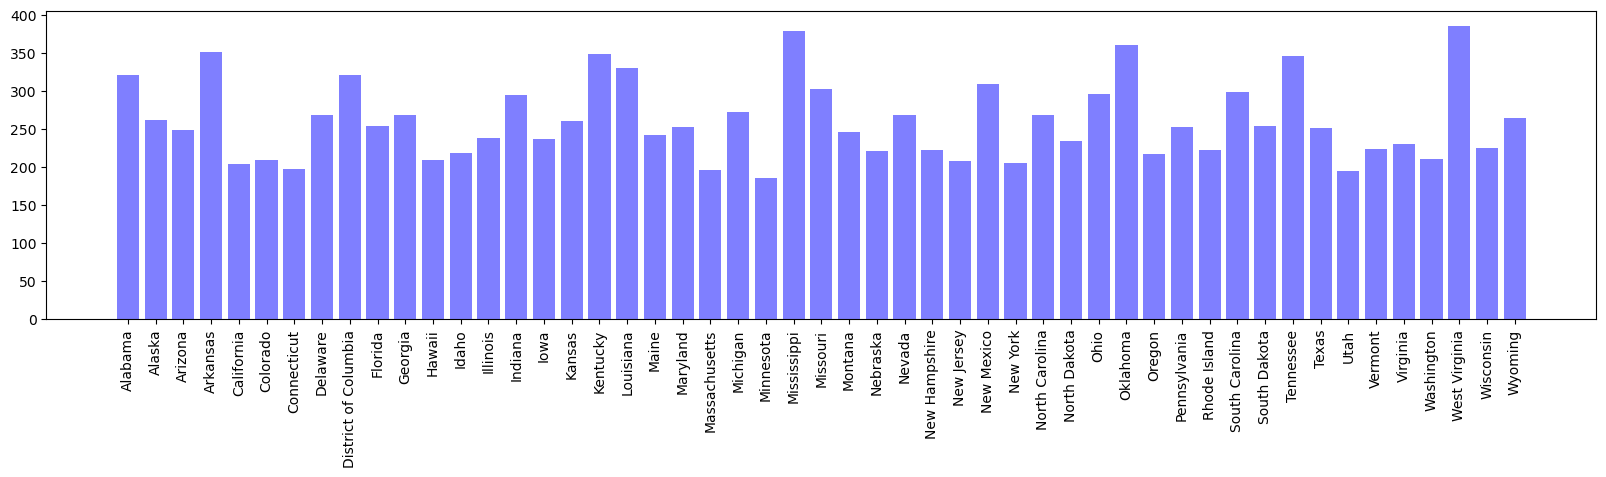

In [36]:
x_axis = np.arange(len(avoi_deaths_df))
tick_locations = [State for State in x_axis]
plt.figure(figsize=(20,4))
plt.bar(x_axis, avoi_deaths_df["Deaths per 100k Population"], color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, avoi_deaths_df["State"], rotation="vertical")
plt.show()

In [37]:
# This one is NOT correct yet - playing with the idea of standard deviation bars - currently it's not doing standard deviation from the average
# std_dev = avoi_deaths_df['Deaths per 100k Population'].std()

# x_axis = np.arange(len(avoi_deaths_df))
# tick_locations = [State for State in x_axis]
# plt.figure(figsize=(20,4))
# plt.bar(x_axis, avoi_deaths_df["Deaths per 100k Population"], color='b', alpha=0.5, align="center")
# plt.xticks(tick_locations, avoi_deaths_df["State"], rotation="vertical")
# plt.errorbar(avoi_deaths_df['State'], avoi_deaths_df['Deaths per 100k Population'], yerr=std_dev, fmt='o', color='r', ecolor='black', capsize=5)
# plt.show()

In [38]:
# Sort the data set high to low - Top 5 results
unis_clean_1819_sorted = unis_clean_1819.sort_values("Percentage of Uninsured Adults")
unis_clean_1819_sorted.head()

,State,Percentage of Uninsured Adults
21,Massachusetts,4.10
8,District of Columbia,4.20
11,Hawaii,5.75
39,Rhode Island,5.85
46,Vermont,6.10


In [39]:
# bottom 5 results
unis_clean_1819_sorted.tail()

,State,Percentage of Uninsured Adults
10,Georgia,19.00
24,Mississippi,19.05
9,Florida,19.35
36,Oklahoma,20.55
43,Texas,24.20


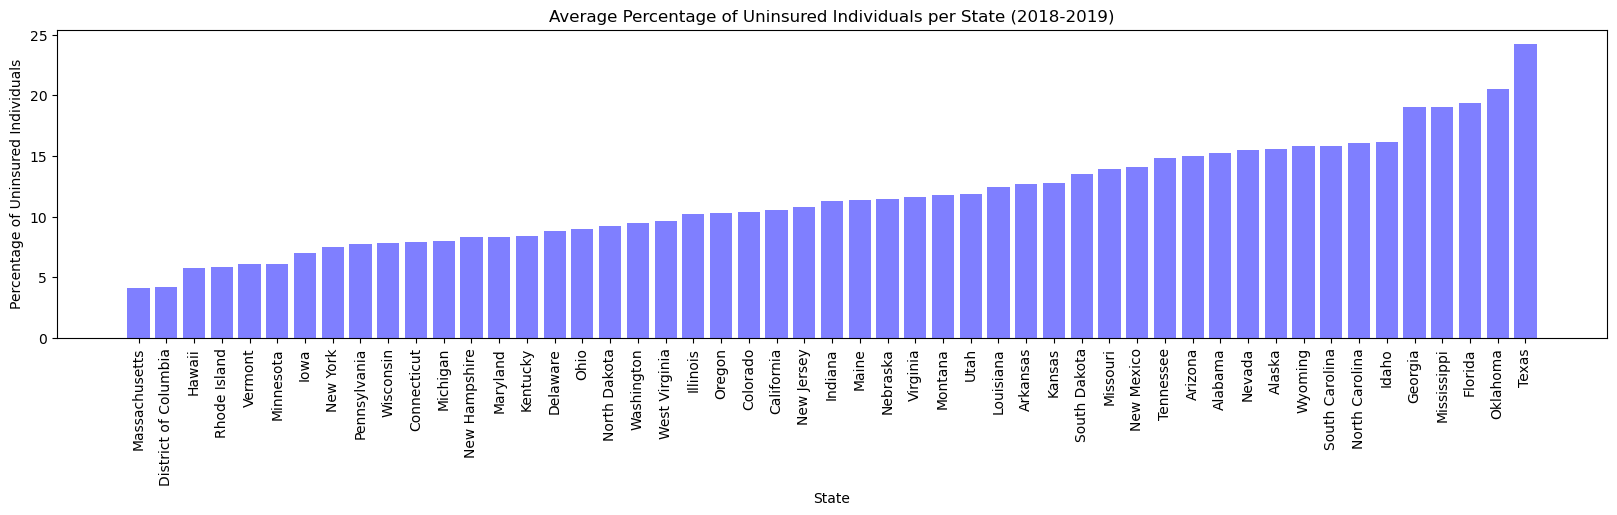

In [40]:
x_axis = np.arange(len(unis_clean_1819_sorted))
tick_locations = [State for State in x_axis]
plt.figure(figsize=(20,4))
plt.bar(x_axis, unis_clean_1819_sorted["Percentage of Uninsured Adults"], color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, unis_clean_1819_sorted["State"], rotation="vertical")
plt.title('Average Percentage of Uninsured Individuals per State (2018-2019)')
plt.xlabel('State')
plt.ylabel('Percentage of Uninsured Individuals')
plt.show()

In [41]:
# Sort the data set high to low - top 5 results
avoi_deaths_df_sorted = avoi_deaths_df.sort_values("Deaths per 100k Population")
avoi_deaths_df_sorted.head()

,Years,State,Deaths per 100k Population
24,2018-19,Minnesota,185.9
45,2018-19,Utah,195.4
22,2018-19,Massachusetts,196.5
7,2018-19,Connecticut,197.9
5,2018-19,California,203.8


In [42]:
# Bottom 5 results
avoi_deaths_df_sorted.tail()

,Years,State,Deaths per 100k Population
18,2018-19,Kentucky,348.3
4,2018-19,Arkansas,351.0
37,2018-19,Oklahoma,360.1
25,2018-19,Mississippi,379.0
49,2018-19,West Virginia,385.6


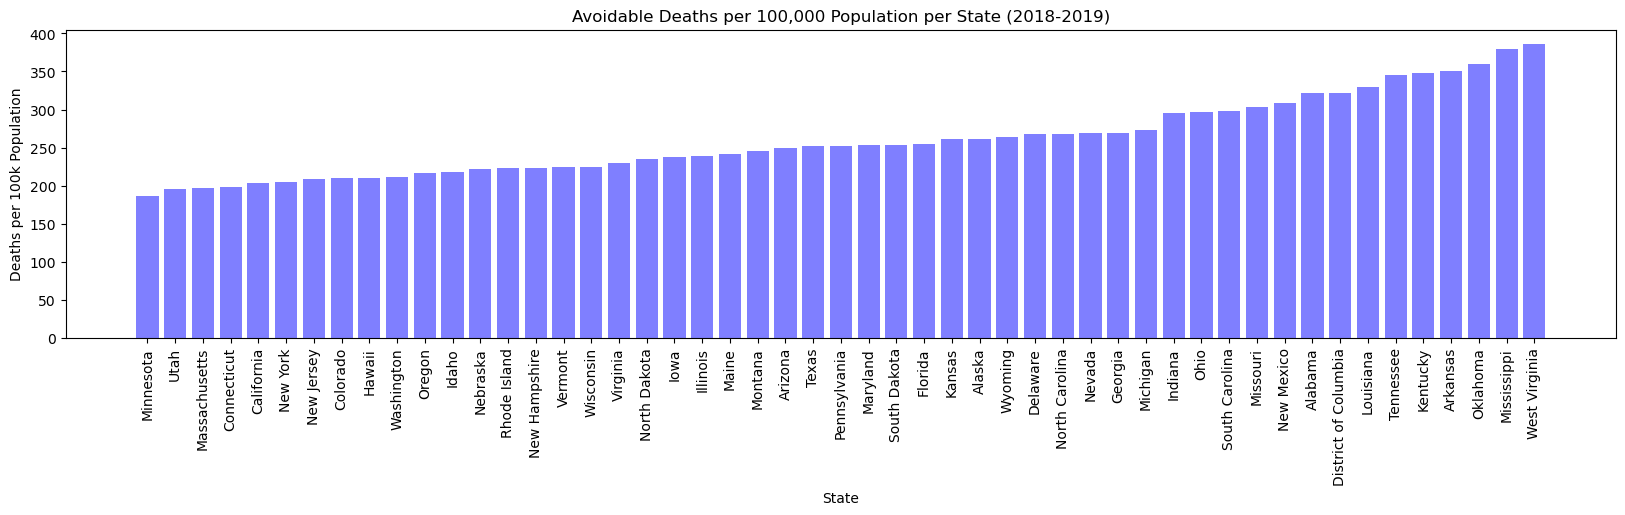

In [43]:
x_axis = np.arange(len(avoi_deaths_df_sorted))
tick_locations = [State for State in x_axis]
plt.figure(figsize=(20,4))
plt.bar(x_axis, avoi_deaths_df_sorted["Deaths per 100k Population"], color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, avoi_deaths_df_sorted["State"], rotation="vertical")
plt.title('Avoidable Deaths per 100,000 Population per State (2018-2019)')
plt.xlabel('State')
plt.ylabel('Deaths per 100k Population')
plt.show()

In [44]:
# Sort the data set high to low 
treat_deaths_df_sorted = treat_deaths_df.sort_values("Deaths per 100k Population")
treat_deaths_df_sorted.head()

,Years,State,Deaths per 100k Population
24,2018-19,Minnesota,59.5
22,2018-19,Massachusetts,59.6
6,2018-19,Colorado,61.0
7,2018-19,Connecticut,62.0
46,2018-19,Vermont,62.2


In [45]:
# Bottom 5 results
treat_deaths_df_sorted.tail()

,Years,State,Deaths per 100k Population
19,2018-19,Louisiana,115.1
49,2018-19,West Virginia,116.6
37,2018-19,Oklahoma,117.7
4,2018-19,Arkansas,121.7
25,2018-19,Mississippi,137.5


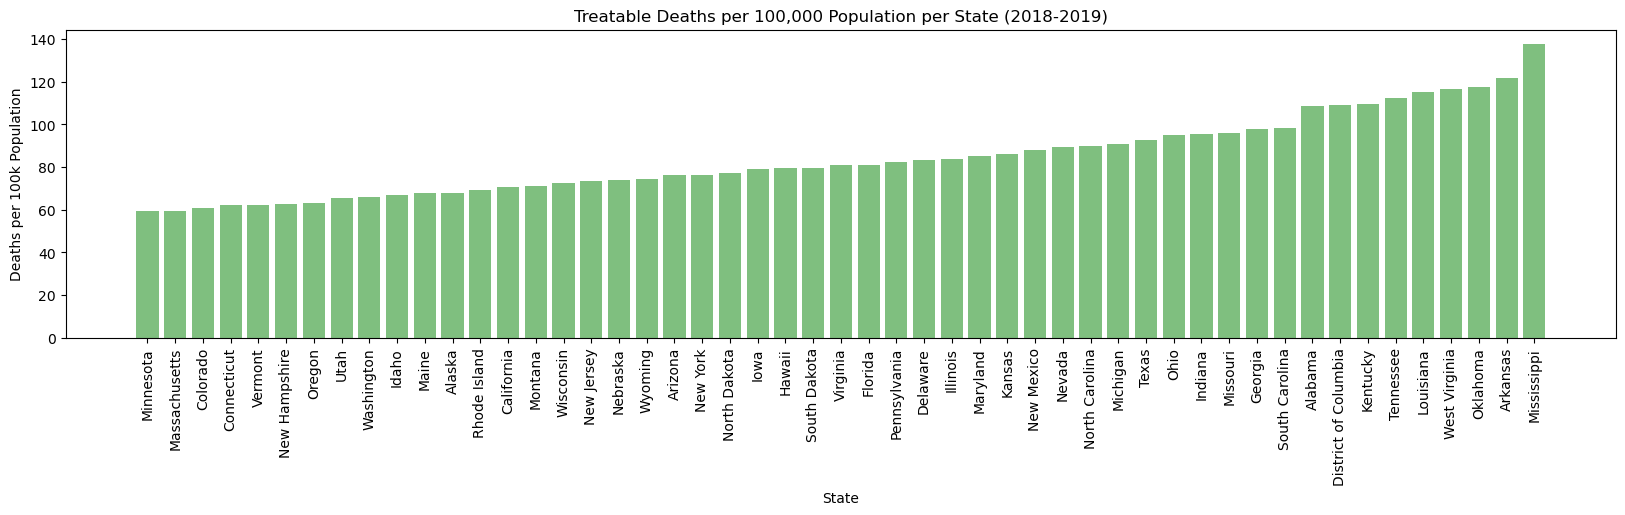

In [46]:
x_axis = np.arange(len(treat_deaths_df_sorted))
tick_locations = [State for State in x_axis]
plt.figure(figsize=(20,4))
plt.bar(x_axis, treat_deaths_df_sorted["Deaths per 100k Population"], color='g', alpha=0.5, align="center")
plt.xticks(tick_locations, treat_deaths_df_sorted["State"], rotation="vertical")
plt.title('Treatable Deaths per 100,000 Population per State (2018-2019)')
plt.xlabel('State')
plt.ylabel('Deaths per 100k Population')
plt.show()

In [47]:
# Sort the data set high to low - top 5 results
prev_deaths_df_sorted = prev_deaths_df.sort_values("Deaths per 100k Population")
prev_deaths_df_sorted.head()

,Years,State,Deaths per 100k Population
24,2018-19,Minnesota,126.4
33,2018-19,New York,129.1
45,2018-19,Utah,130.1
12,2018-19,Hawaii,130.2
5,2018-19,California,133.1


In [48]:
# Bottom 5 results
prev_deaths_df_sorted.tail()

,Years,State,Deaths per 100k Population
43,2018-19,Tennessee,233.4
18,2018-19,Kentucky,238.7
25,2018-19,Mississippi,241.5
37,2018-19,Oklahoma,242.4
49,2018-19,West Virginia,269.0


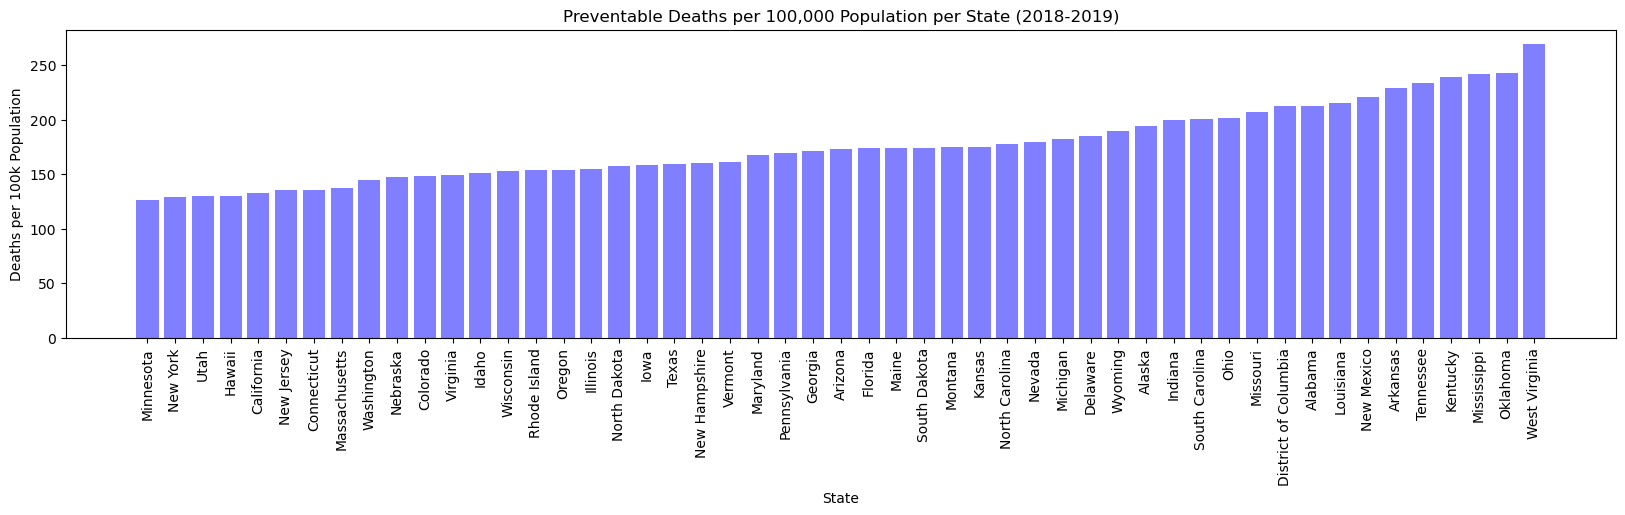

In [49]:
x_axis = np.arange(len(prev_deaths_df_sorted))
tick_locations = [State for State in x_axis]
plt.figure(figsize=(20,4))
plt.bar(x_axis, prev_deaths_df_sorted["Deaths per 100k Population"], color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, prev_deaths_df_sorted["State"], rotation="vertical")
plt.title('Preventable Deaths per 100,000 Population per State (2018-2019)')
plt.xlabel('State')
plt.ylabel('Deaths per 100k Population')
plt.show()

In [50]:
# We ATTEMPTED to use the existing dataframes without the US -- but because those dropped based on index
# the indexes didn't align and we got errors -- going to try to redo dfs instead

# unis_clean_1819.reset_index()
# percentage_unis = unis_clean_1819["Percentage of Uninsured Adults"]
# unis_1819_df = pd.DataFrame(percentage_unis)
# unis_1819_df.head()

In [51]:
# avoi_deaths_df.reset_index()
# avoi_factor = avoi_deaths_df["Deaths per 100k Population"]
# avoi_clean_df = pd.DataFrame(avoi_factor)
# avoi_clean_df.head()

In [52]:
# Creating an official DataFrame for the uninsured data to utilize with graphs
unis_1819_steptodf = census_1819_df.groupby("State")["Percentage of Uninsured Adults"].mean().reset_index()
unis_factor = unis_1819_steptodf["Percentage of Uninsured Adults"]
unis_1819_df = pd.DataFrame(unis_factor)

# Display the resulting DataFrame
unis_1819_df.head()

,Percentage of Uninsured Adults
0,15.25
1,15.60
2,15.00
3,12.70
4,10.55


In [53]:
# creating an official dataframe for the avoidable deaths data
avoi_factor = avoi_deaths_narrow["Deaths per 100k Population"]
avoidable_deaths_df = pd.DataFrame(avoi_factor)
avoidable_deaths_df.head()

,Deaths per 100k Population
0,250.1
1,321.2
2,261.7
3,249.3
4,351.0


In [54]:
uninsured = unis_1819_df['Percentage of Uninsured Adults']
deaths = avoidable_deaths_df['Deaths per 100k Population']
# the next line (pd.concat) is from ChatGPT : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html
clean_data_df = pd.concat([uninsured, deaths], axis=1).dropna()
clean_data_df.head()

,Percentage of Uninsured Adults,Deaths per 100k Population
0,15.25,250.1
1,15.60,321.2
2,15.00,261.7
3,12.70,249.3
4,10.55,351.0


The correlation between both factors is 0.13


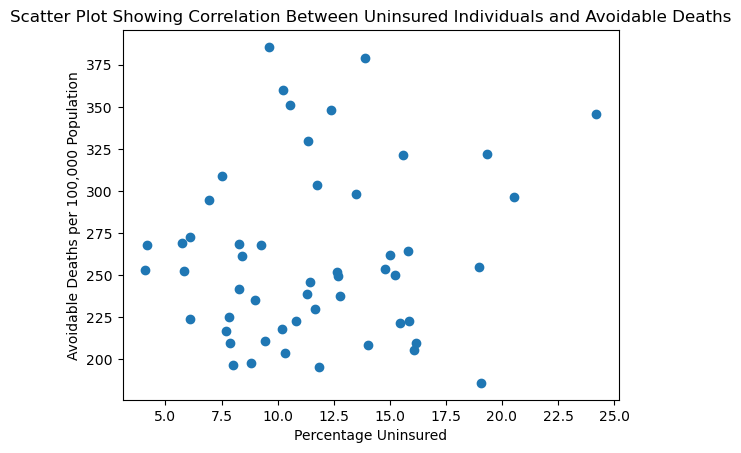

In [55]:
x_uninsured = clean_data_df.iloc[:,0] 
y_deaths = clean_data_df.iloc[:,1] 
correlation = st.pearsonr(x_uninsured,y_deaths) 
plt.scatter(x_uninsured,y_deaths) 
plt.xlabel('Percentage Uninsured') 
plt.ylabel('Avoidable Deaths per 100,000 Population')
plt.title('Scatter Plot Showing Correlation Between Uninsured Individuals and Avoidable Deaths')
print(f"The correlation between both factors is {round(correlation[0],2)}") 
plt.show()

In [56]:
unis_avoi = pd.merge(unis_clean_1819, avoi_deaths_df, on=["State"])
unis_avoi.head(15)

,State,Percentage of Uninsured Adults,Years,Deaths per 100k Population
0,Alabama,15.25,2018-19,321.2
1,Alaska,15.60,2018-19,261.7
2,Arizona,15.00,2018-19,249.3
3,Arkansas,12.70,2018-19,351.0
4,California,10.55,2018-19,203.8
5,Colorado,10.35,2018-19,209.5
6,Connecticut,7.90,2018-19,197.9
7,Delaware,8.80,2018-19,267.9
8,District of Columbia,4.20,2018-19,321.7
9,Florida,19.35,2018-19,254.7


The correlation between both factors is 0.38


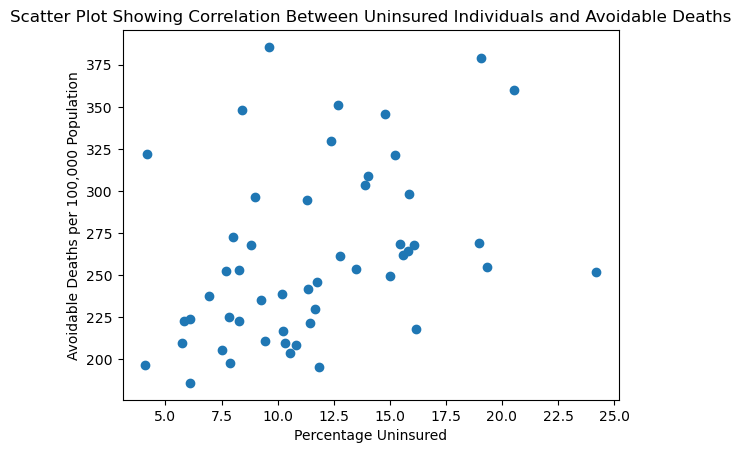

In [57]:
x_uninsured = unis_avoi.iloc[:,1] 
y_deaths = unis_avoi.iloc[:,3] 
correlation = st.pearsonr(x_uninsured,y_deaths) 
plt.scatter(x_uninsured,y_deaths) 
plt.xlabel('Percentage Uninsured') 
plt.ylabel('Avoidable Deaths per 100,000 Population')
plt.title('Scatter Plot Showing Correlation Between Uninsured Individuals and Avoidable Deaths')
print(f"The correlation between both factors is {round(correlation[0],2)}") 
plt.show()

In [58]:
unis_treat = pd.merge(unis_clean_1819, treat_deaths_df, on=["State"])
unis_treat.tail(15)

,State,Percentage of Uninsured Adults,Years,Deaths per 100k Population
36,Oklahoma,20.55,2018-19,117.7
37,Oregon,10.25,2018-19,63.0
38,Pennsylvania,7.70,2018-19,82.5
39,Rhode Island,5.85,2018-19,69.3
40,South Carolina,15.85,2018-19,98.1
41,South Dakota,13.50,2018-19,79.5
42,Tennessee,14.80,2018-19,112.4
43,Texas,24.20,2018-19,92.9
44,Utah,11.85,2018-19,65.3
45,Vermont,6.10,2018-19,62.2


The correlation between both factors is 0.39


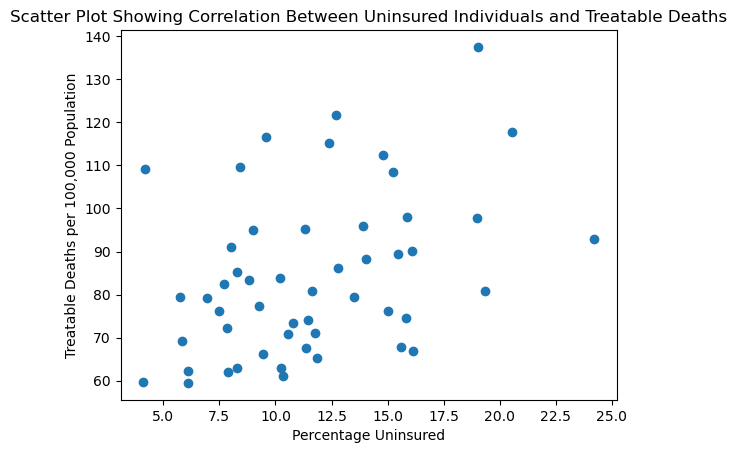

In [59]:
x_uninsured = unis_treat.iloc[:,1] 
y_deaths = unis_treat.iloc[:,3] 
correlation = st.pearsonr(x_uninsured,y_deaths) 
plt.scatter(x_uninsured,y_deaths) 
plt.xlabel('Percentage Uninsured') 
plt.ylabel('Treatable Deaths per 100,000 Population')
plt.title('Scatter Plot Showing Correlation Between Uninsured Individuals and Treatable Deaths')
print(f"The correlation between both factors is {round(correlation[0],2)}") 
plt.show()

In [60]:
unis_prev = pd.merge(unis_clean_1819, prev_deaths_df, on=["State"])
unis_prev.tail(15)

,State,Percentage of Uninsured Adults,Years,Deaths per 100k Population
36,Oklahoma,20.55,2018-19,242.4
37,Oregon,10.25,2018-19,153.7
38,Pennsylvania,7.70,2018-19,169.7
39,Rhode Island,5.85,2018-19,153.4
40,South Carolina,15.85,2018-19,200.2
41,South Dakota,13.50,2018-19,174.4
42,Tennessee,14.80,2018-19,233.4
43,Texas,24.20,2018-19,159.2
44,Utah,11.85,2018-19,130.1
45,Vermont,6.10,2018-19,161.6


The correlation between both factors is 0.35


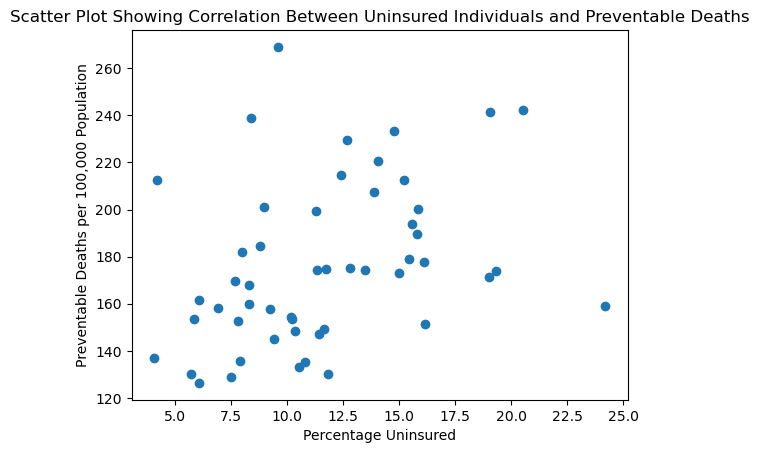

In [61]:
x_uninsured = unis_prev.iloc[:,1] 
y_deaths = unis_prev.iloc[:,3] 
correlation = st.pearsonr(x_uninsured,y_deaths) 
plt.scatter(x_uninsured,y_deaths) 
plt.xlabel('Percentage Uninsured') 
plt.ylabel('Preventable Deaths per 100,000 Population')
plt.title('Scatter Plot Showing Correlation Between Uninsured Individuals and Preventable Deaths')
print(f"The correlation between both factors is {round(correlation[0],2)}") 
plt.show()